# [Kaggle_Salary_Data](https://www.kaggle.com/datasets/mohithsairamreddy/salary-data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import warnings 
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False
warnings.filterwarnings('ignore')

## 1. EDA

In [2]:
df =pd.read_csv(os.getcwd() + '/data/salary/Salary_Data.csv')
display(df.head())
print(df.info())
print(df.isna().sum())

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [3]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


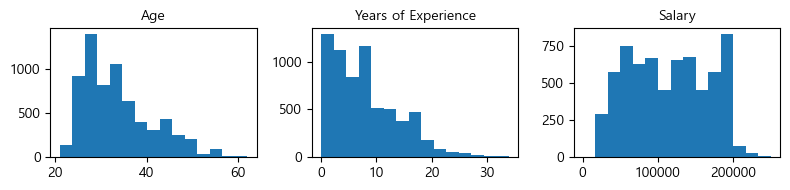

In [11]:
# 연속형 변수 히스토그램
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8,2))
for i, feature in zip(range(3), ['Age', 'Years of Experience', 'Salary']):
    col = i % 3
    ax[col].hist(feature, bins=15, data=df)
    ax[col].set_title(feature, fontsize=10)
    
plt.tight_layout();

In [20]:
# 범주형 변수
print(df['Gender'].value_counts())
print('-'*40)
print(df['Education Level'].value_counts())
print('-'*40)
print(df['Job Title'].value_counts())

Male      3674
Female    3014
Other       14
Name: Gender, dtype: int64
----------------------------------------
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64
----------------------------------------
Software Engineer               518
Data Scientist                  453
Software Engineer Manager       376
Data Analyst                    363
Senior Project Engineer         318
                               ... 
Senior Marketing Director         1
IT Support                        1
Senior Researcher                 1
Senior IT Support Specialist      1
Senior Account Manager            1
Name: Job Title, Length: 193, dtype: int64


In [27]:
df = df.fillna(df.mean())
df.loc[df['Gender'].isna(), 'Gender'] = 'Female'
df.loc[df['Education Level'].isna(), 'Education Level'] = "Bachelor's Degree"
df.loc[df['Job Title'].isna(), 'Job Title'] = "Software Engineer"
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [28]:
df.corr()

,Age,Years of Experience,Salary
Age,1.000000,0.937585,0.727986
Years of Experience,0.937585,1.000000,0.808962
Salary,0.727986,0.808962,1.000000


[해석]
1. 결측치 존재 여부
    - 연속형 변수의 결칙는 각 변수들의 평균으로 대체했고, 범주형 변수는 최빈값으로 대체하였다.
1. 데이터 구성
    - 종속변수인 Salary는 float형으로 구성됐고, 독립변수는 object, float형으로 구성되었다.
1. 독립변수와 종속변수의 상관관계
    - Age와 Years of Experience 모두 종속변수와 높은 상관성(각각 0.73, 0.81)을 보이고 있다.
1. 독립변수 간 상관관계
    - Age와 Years of Experience 간에 높은 상관성(0.94)이 보이므로 다중공선성을 의심할 수 있다.
1. 주의사항
    - 다중공선성 문제를 주의하여야 한다. 따라서 두 변수 중 하나만 사용하거나 다중공선성 문제를 해결할 수 있는 모델을 사용한다. 예를 들어 랜덤포레스트, XGBoost, SVM 등이 있을 것이다.
    - 수치형 연속변수의 단위가 서로 상이하므로 스케일링을 통해 값의 범위를 맞추는 방법을 고려할 수 있을 것이다.

## 2. 통계 분석
### 1) 일표본 t-test(모분산 모름, 유의수준 5%)
- 귀무가설: 평균 나이는 35세이다.
- 대립가설: 평균 나이는 35세가 아니다.

In [56]:
import scipy.stats as stats
stats_df = df.copy()
np.random.seed(1234)
sample = np.random.choice(stats_df['Age'], 23)
stats.shapiro(sample) # 정규성 만족
print(stats.ttest_1samp(sample, popmean=35)) # 귀무가설 채택
print('신뢰구간: ', stats.t.interval(alpha=0.95, df=23-1, loc=np.mean(sample), scale=stats.sem(sample)))

Ttest_1sampResult(statistic=0.4470307566725238, pvalue=0.6592228234937161)
신뢰구간:  (31.83546273514309, 39.90366769963952)


### 2) 독립표본 t-test(모분산 모름, 유의수준 5%)
- 귀무가설: 성별에 따라 평균 연봉에 차이가 없다.
- 대립가설: 성별에 따라 평균 연봉에 차이가 있다.

In [57]:
np.random.seed(1234)
a_sample = np.random.choice(stats_df.loc[df['Gender']=='Male', 'Salary'], 20)
b_sample = np.random.choice(stats_df.loc[df['Gender']=='Female', 'Salary'], 23)
stats.shapiro(a_sample) # 정규성 만족 안 함
stats.shapiro(b_sample) # 정규성 만족 안 함
print(stats.mannwhitneyu(a_sample, b_sample)) # 귀무가설 기각

def sp(data1, data2):
    df = len(data1) + len(data2) -2
    s1 = (len(data1)-1) * (data1.std()**2)
    s2 = (len(data2)-1) * (data2.std()**2)
    sp = np.sqrt((s1+s2)/df)
    return sp

alpha=0.95
dof=len(a_sample) + len(b_sample) -2
diff_mean= np.mean(a_sample) - np.mean(b_sample)
s = sp(a_sample, b_sample)*(1/len(a_sample) + 1/len(b_sample))
print('신뢰구간: ', stats.t.interval(alpha, dof, loc=diff_mean, scale=s))

MannwhitneyuResult(statistic=250.5, pvalue=0.625733804325916)
신뢰구간:  (-6607.083900556287, 15757.170857078016)


In [55]:
stats_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
